In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('LoanDataset_test.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [3]:
test =pd.read_csv('LoanDatasets.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train_orginal = train.copy()
test_orginal = test.copy()


In [9]:
train.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
test.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [14]:
train.shape

(367, 12)

In [15]:
test.shape

(631, 13)

In [23]:
test['Loan_Status'].value_counts()

Y    435
N    196
Name: Loan_Status, dtype: int64

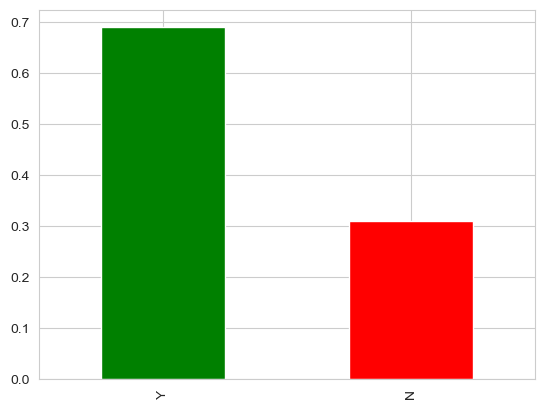

In [108]:

test['Loan_Status'].value_counts(normalize=True).plot.bar( color=("green", "red"))

plt.show()

In [28]:
#lets devide the data into different types of variables are Categorical, ordinal, and numerical.
#Categorical features:Gender, Married, Self_Employed, Credit_History, Loan_Status
#Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)
#Numerical features: These features have numerical values (ApplicantIncome, Co-applicantIncome, LoanAmount, Loan_Amount_Term)


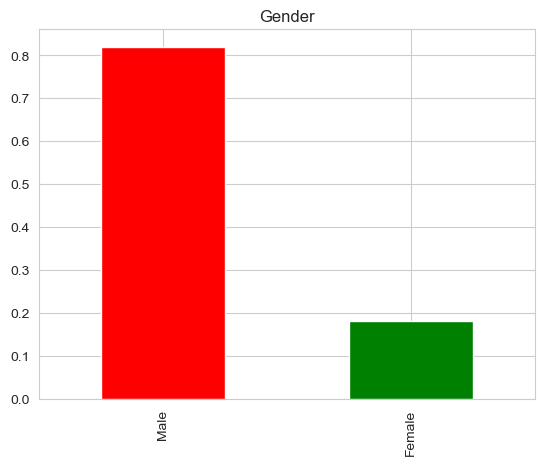

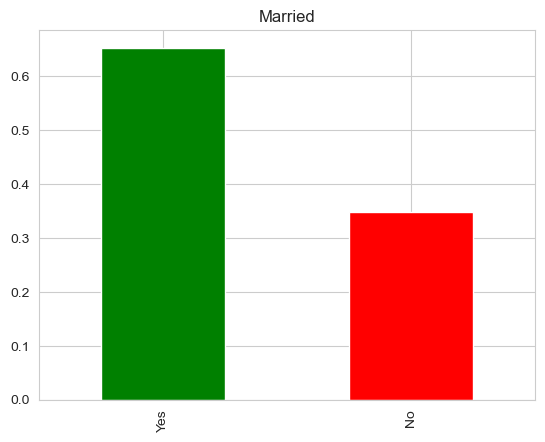

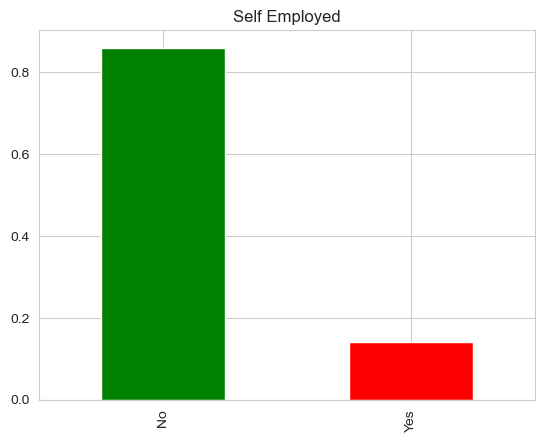

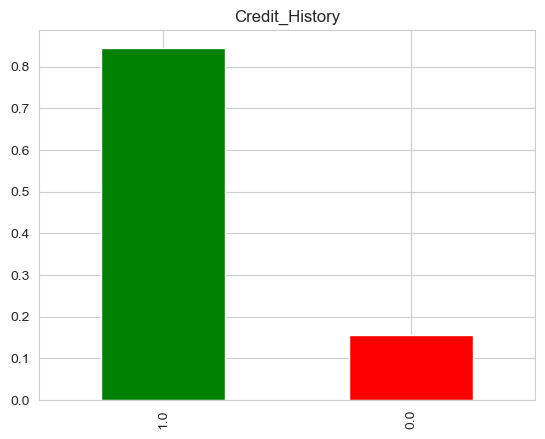

In [92]:
#Independent Variable (Categorical)
test['Gender'].value_counts(normalize=True).plot.bar( title='Gender', color=("red", "green"))
plt.show()
test['Married'].value_counts(normalize=True).plot.bar(title='Married', color=("green", "red"))
plt.show()
test['Self_Employed'].value_counts(normalize=True).plot.bar(title="Self Employed", color=("green", "red"))
plt.show()
test['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History', color=("green", "red"))
plt.show()

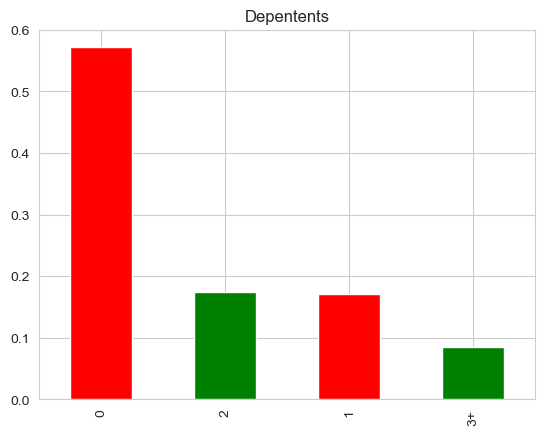

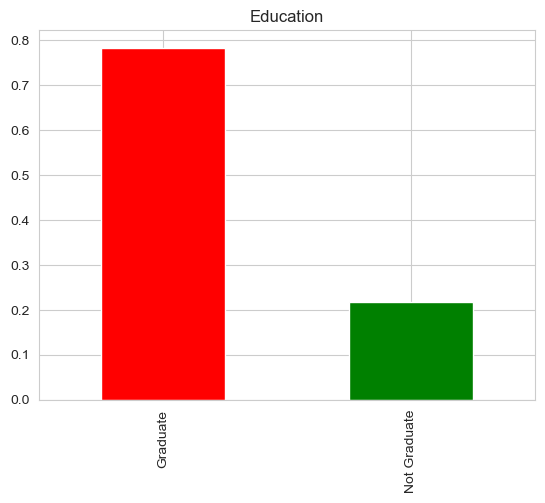

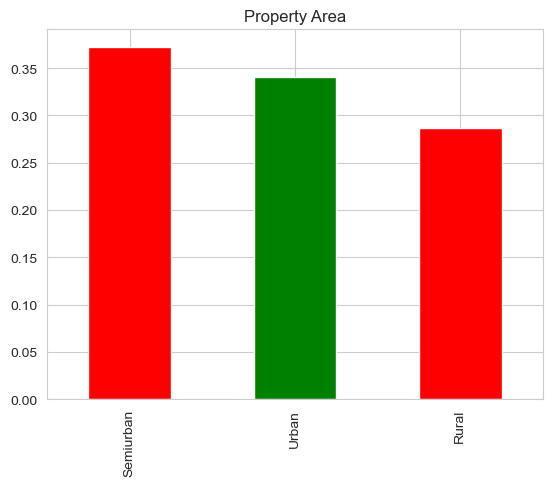

In [109]:
#Independent Variable (Ordinal)
test['Dependents'].value_counts(normalize=True).plot.bar(title='Depentents', color=("red", "green"))
plt.show()
test['Education'].value_counts(normalize=True).plot.bar(title="Education", color=('red', 'green'))
plt.show()
test['Property_Area'].value_counts(normalize=True).plot.bar(title='Property Area', color=('red', 'green'))
plt.show()

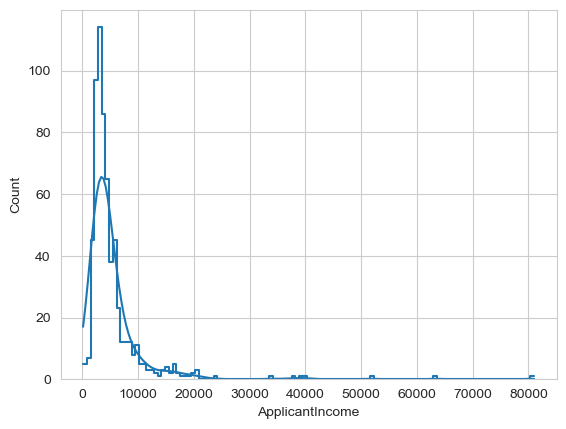

In [88]:
sns.histplot(test['ApplicantIncome'], kde=True, fill=False, element="step")
plt.show()


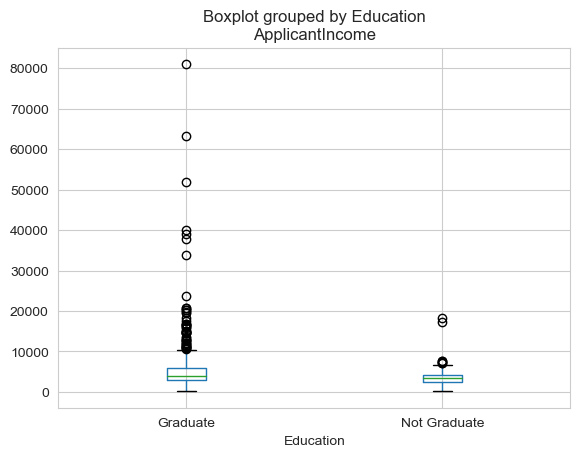

In [110]:
test.boxplot(column='ApplicantIncome', by ='Education')
plt.show()

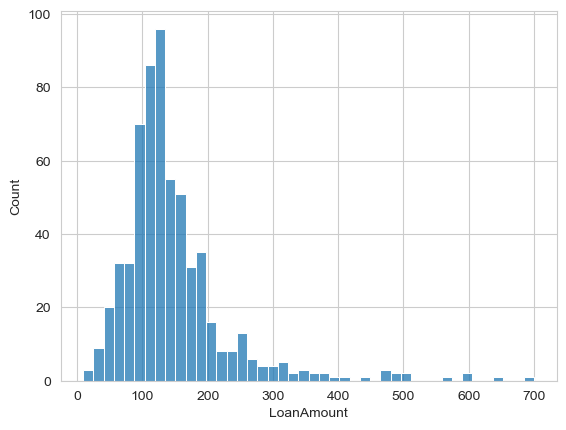

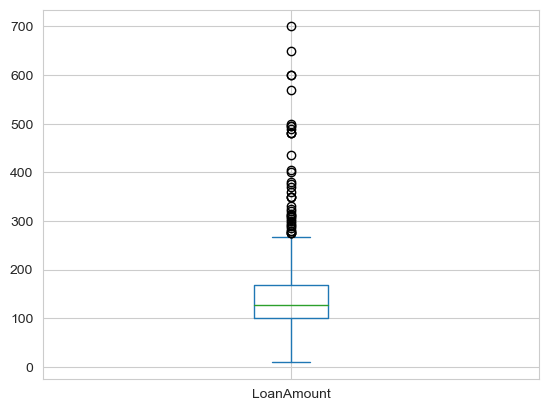

In [95]:
test.notna()
sns.histplot(test['LoanAmount'])
plt.show()
test["LoanAmount"].plot.box()
plt.show()

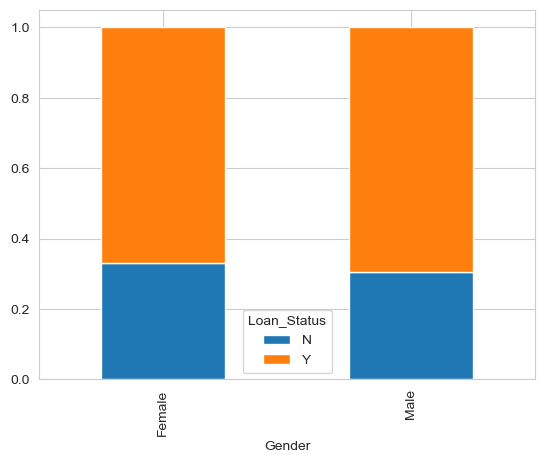

In [120]:
#bivariate analysis
Gender = pd.crosstab(test['Gender'], test['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,)

plt.show()

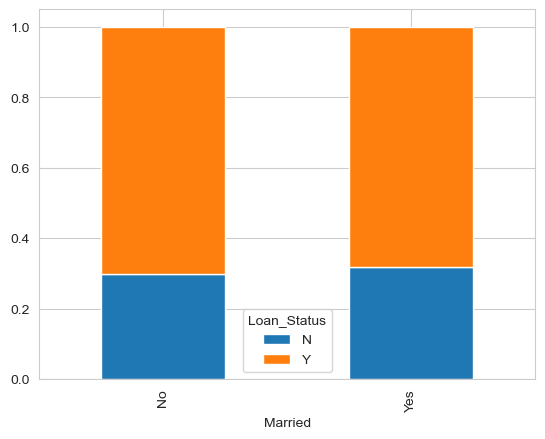

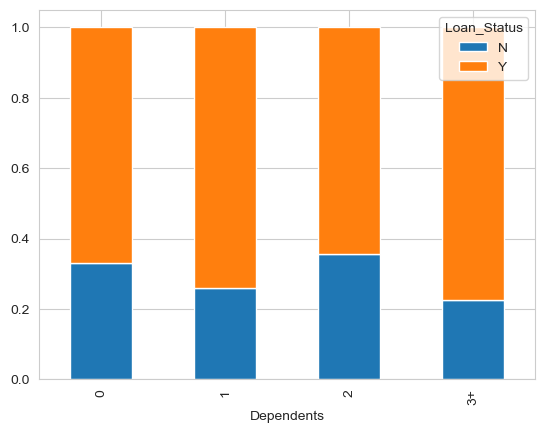

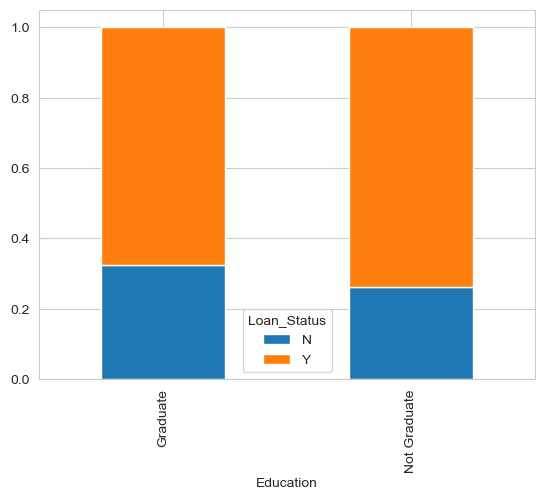

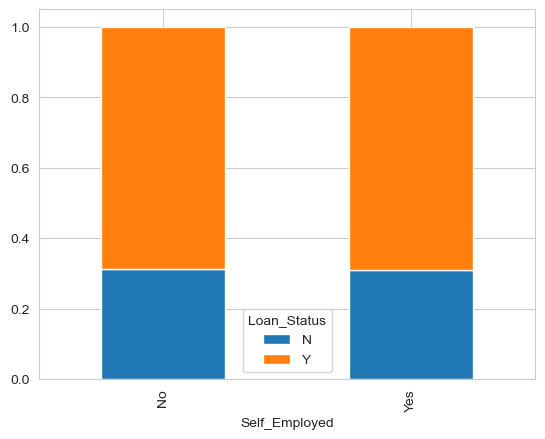

In [119]:
Married = pd.crosstab(train['Married'], test['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'], test['Loan_Status'])
Education=pd.crosstab(train['Education'],test['Loan_Status'])
Self_Employment = pd.crosstab(test['Self_Employed'], test["Loan_Status"])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,)
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,)
plt.show()

Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,)
plt.show()

Self_Employment.div(Self_Employment.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,)
plt.show()